In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-test-data/student_performance_dataset_new_X_test_values.csv
/kaggle/input/student-performance/student_performance_dataset.csv


# **Initialization**
**Importing Libraries**: The necessary libraries are imported to work with data analysis and visualization

**Loading Data**: The student performance data is loaded from a CSV file named "student_performance_dataset.csv" using the pandas library. The variables Studyhours, PreviousScores, PracticeTests, Age, and FinalScores are extracted and stored in separate lists

**Test Data**: Test dataset named "student_performance_dataset_new_X_test_values.csv" is loaded using a similar approach to store the test data

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv('/kaggle/input/student-performance/student_performance_dataset.csv')
studyHours = df['StudyHours'].values.tolist()
previousScore = df['PreviousScore'].values.tolist()
practiceTests = df['PracticeTests'].values.tolist()
age = df['Age'].values.tolist()
finalScore = df['FinalScore'].values.tolist()


testdf = pd.read_csv("/kaggle/input/student-performance-test-data/student_performance_dataset_new_X_test_values.csv")
teststudyHours = testdf['StudyHours'].values.tolist()
testpreviousScore = testdf['PreviousScore'].values.tolist()
testpracticeTests = testdf['PracticeTests'].values.tolist()
testage = testdf['Age'].values.tolist()

# **Q1 Bivariate Regression Implementation**

Implement a Python function that performs bivariate regression on a given
dataset. The function should take two lists as inputs, one for the independent variable $(X)$ and another for the dependent variable $(Y)$. The function
should return the slope $(β_1)$ and the y-intercept $(β_0)$ of the regression line.

We have the equation:

$$\hat{\beta_1} = {\sum\limits_{i = 1}^{n} {x_i.y_i} \over \sum\limits_{i = 1}^{n} x_i^2}$$

$$\hat{\beta_0} = {\overline Y - \beta_1 \overline X}$$

$$\hat{Y} = {\hat{\beta_0} + \hat{\beta_1}.X}$$

where,\
$x_i = $ Mean centered $X$ \
$y_i = $ Mean centered $Y$ \
$\overline X = $ Mean centered $X$ \
$\overline Y = $ Mean centered $Y$ 

In [215]:
def Bivariate_regression(X = studyHours , Y = finalScore):
    X = np.array(X)
    Y = np.array(Y)
    X_ = np.mean(X)
    Y_ = np.mean(Y)
    x = X - X_
    y = Y - Y_
    n = x.shape[0]
    sumxy = np.dot(x,y)
    sumxx = np.dot(x,x)
    beta1 = sumxy/sumxx
    beta0 = Y_ - beta1*X_
    return (beta0 , beta1)



Regression1 = Bivariate_regression(studyHours,finalScore)
Regression2 = Bivariate_regression(previousScore,finalScore)
Regression3 = Bivariate_regression(practiceTests,finalScore)
Regression4 = Bivariate_regression(age,finalScore)

print("Bivariate Regression between StudyHours and \
FinalScore: " ,"\n\nBeta0: {}  , Beta1: {}".format(Regression1[0],Regression1[1]))

Bivariate Regression between StudyHours and FinalScore:  

Beta0: 35.18809002805719  , Beta1: 2.2059407735943837


## Conclusions

**Intercept ($\beta_0$):** The intercept term, represented by $\beta_0$ (approximately $35.19$), suggests that when a student does not spend any time studying (**StudyHours = 0**), the predicted **FinalScore** is approximately 35.19. This intercept might not have a practical interpretation since spending zero hours studying is unrealistic.

**Slope ($\beta_1$):** The slope term, represented by $\beta_1$ (approximately $2.206$), indicates that for each additional unit increase in **StudyHours**, the **FinalScore** is expected to increase by approximately $2.206$ points. This implies a positive linear relationship between study hours and the final score.


# **Q2 Scatter Plot and Regression Line**

Write a Python function that reads a data frame containing two columns
of data ($X$ and $Y$) and visualizes the data points as a scatter plot. Additionally, the function should calculate and plot the regression line over the
scatter plot. Label the plot appropriately with a title, axes labels, and a
legend for the regression line

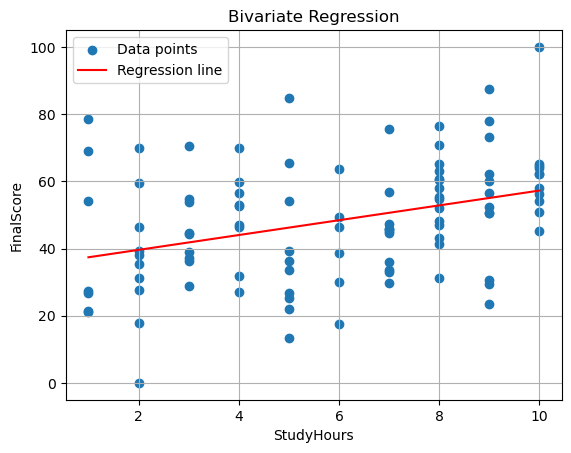

In [216]:
def Scatter_plot_and_regression(df):
    '''Input
        df:  data frame containing two columns of data(X : independent variable
        and Y: dependent variable)'''
    independent_variable , dependent_variable = df.columns
    X = np.array(df.iloc[:,0])
    Y = np.array(df.iloc[:,1])
    
    beta0 ,beta1 = Bivariate_regression(X , Y)
    X_new = np.linspace(min(X),max(X),X.shape[0])
    Y_hat = beta0 + beta1*X_new
    plt.scatter(X, Y, label="Data points")
    plt.plot(X_new , Y_hat,color='red',label ='Regression line')
    plt.legend()
    plt.ylabel(dependent_variable)
    plt.xlabel(independent_variable)
    plt.grid()
    plt.title(f"Bivariate Regression")
    plt.show()

Scatter_plot_and_regression(df.iloc[:,[0,4]])


## Conclusions

The regression line represents the conditional expectation of the dependent variable $Y$ given the independent variable $X$, denoted as $E[Y|X]$. This line indicates the average value of $Y$ for each corresponding value of $X$. The slope of the regression line ($\beta_1$) indicates the change in $Y$ for a unit change in $X$, and the intercept ($\beta_0$) is the predicted $Y$ value when $X$ is 0.


# **Q3 Coefficient of Determination (r-squared)**

Create a Python function that calculates the coefficient of determination
($r$-squared) for a given dataset and its corresponding regression line ($β_0$
and $β_1$). The function should take three lists as inputs: $X, Y$, and the
predicted $Y$ values from the regression line. The function should return
the $r$-squared value.

We have the equation:

$$residual_i = Y_i - \hat Y$$

$$\hat y_i = \hat Y_i - \overline{\hat{Y}}$$

$$y_i = { Y_i - \overline{Y}}$$

$$ESS = {\sum\limits_{i = 1}^{n} {\hat y_i^2}}$$ = expected sum of squares

$$TSS = {\sum\limits_{i = 1}^{n} {y_i^2}}$$ = total sum of squares

$$RSS = {\sum\limits_{i = 1}^{n} {residual_i^2}}$$ = total sum of squares

$$r^2 = {ESS \over TSS} = {1 - {RSS \over TSS}}$$

coefficient of determination for regression between StudyHours and FinalScore: 0.12683665100020564


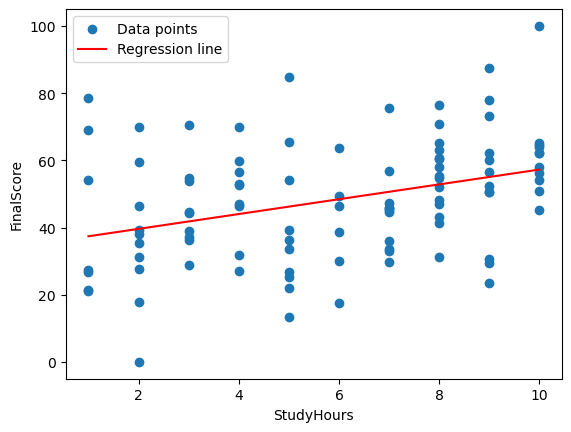

In [217]:
def coeff_of_determination(X,Y,Y_predicted):
    '''Input
        X: independent variable
        Y: dependent variable
        Y_predicted : Predicted values from the regression'''
    X = np.array(X)
    Y = np.array(Y)
    Y_predicted = np.array(Y_predicted)
    y = Y - np.mean(Y)
    y_predicted = Y_predicted - np.mean(Y_predicted)
    ESS = np.dot(y_predicted,y_predicted)
    TSS = np.dot(y , y)
    r_squared = ESS/TSS
    return r_squared

X = studyHours
independent_variable = "StudyHours"
beta0 , beta1 = Bivariate_regression(X,finalScore)
Y_predicted = beta0 + np.array(X)*beta1
r_squared = coeff_of_determination(X,finalScore,Y_predicted)
print(f"coefficient of determination for regression between {independent_variable} and FinalScore: {r_squared}")
X_smooth = np.linspace(min(X),max(X),len(X))
Y_predicted_smooth = beta0 + beta1*X_smooth
plt.scatter(X, finalScore, label="Data points")
plt.plot(X_smooth , Y_predicted_smooth,color='red',label ='Regression line')
plt.legend()
plt.ylabel('FinalScore')
plt.xlabel(independent_variable)
plt.show()

I have made the regression line smooth by plotting the regression line on equally spaced X variables. In the code it is respresented as X_smooth and the corresponding prediction as Y_predicted_smooth

## Conclusions

While an r-squared value of $0.1268$ suggests a positive linear relationship between **StudyHours** and **FinalScore**, it also implies that a significant portion of the variability in **FinalScore** remains unexplained by the above linear regression model.

# **Q4 r-squared Analysis for Independent Variables**

For each independent variable in the Student Performance dataset, calculate the coefficient of determination ($r$-squared) by performing bivariate
regression with the FinalScore column as the dependent variable. Identify the independent variable with the highest $r$-squared value

In [218]:
def r_squared(X, Y):
    '''Input
        X: Independent variable
        Y: Dependent variable'''
    beta0 , beta1 = Bivariate_regression(X,Y)
    Y_predicted = beta0 + np.array(X)*beta1
    return coeff_of_determination(studyHours,finalScore,Y_predicted)
    
def all_r_squares(df):
    all_r = []
    Independent_variables = [studyHours , previousScore, practiceTests, age]
    i = 0
    for column in Independent_variables:
        r = r_squared(column, finalScore)
        print("r-squared between {} and FinalScore: {}".format(df.columns[i] , r))
        all_r.append(r)
        i+=1
    return all_r
all_rs = all_r_squares(df)
r_argmax, r_max = np.argmax(all_rs), np.max(all_rs)
best_independent_variable = df.columns[r_argmax]
print("maximum r-squared is : {} of independent variable {}".format(r_max, best_independent_variable))

r-squared between StudyHours and FinalScore: 0.12683665100020564
r-squared between PreviousScore and FinalScore: 0.2955111094000574
r-squared between PracticeTests and FinalScore: 0.01309996678807498
r-squared between Age and FinalScore: 0.0010401972998552412
maximum r-squared is : 0.2955111094000574 of independent variable PreviousScore


## Conclusions
The highest r-squared value is observed between "**PreviousScore"** and **"FinalScore,"** with a value of approximately $0.296$. This indicates that the students' previous scores contribute to explaining approximately $29.6%$ of the variability in their final scores. Previous performance appears to have a stronger predictive power compared to study hours, practice tests, and age.

Low r-squared value for all the models above implies that significant portion of the variability in **FinalScore** remains unexplained by any of the above linear regression model.

# **Q5 Residuals and Residual Plot for the Best Variable**

Implement a Python function that reads a data frame containing two
columns of data ($X$ and $Y$), performs bivariate regression for the identified
best independent variable, and then calculates the residuals for each data
point. The script should plot the residuals against the predicted $Y$ values
in a residual plot. Add appropriate labels and a title to the plot.

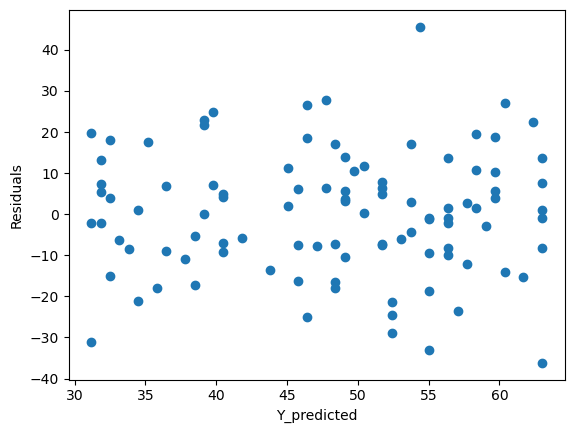

In [219]:
def residuals_plot(df):
    X = np.array(df.iloc[:,0])
    Y = np.array(df.iloc[:,1])
    beta0 , beta1 = Bivariate_regression(X,Y)
    Y_predicted = beta0 + beta1*X
    Residuals = Y - Y_predicted
    plt.scatter(Y_predicted, Residuals, label="Y_predicted vs Residuals")
    plt.xlabel('Y_predicted')
    plt.ylabel('Residuals')
    
residuals_plot(df[[best_independent_variable, "FinalScore"]])

## Conclusions

* The residuals plot depicts the relationship between predicted values (Y_predicted) and the corresponding residuals. Residuals are the differences between the actual "FinalScore" values and their predicted values based on the regression model.
*  Examining the spread of residuals along the predicted values can reveal patterns of heteroscedasticity. If the spread of residuals changes as the predicted values increase, it might indicate that the model's variance is not constant across all ranges of predicted values.If the residuals are uniformly distributed with a consistent spread across all ranges of predicted values, it indicates homoscedasticity, which implies that the variability of the residuals is constant.
* From the above plot we can see that variability in the residuals are even across the predicted value of Y. Hence it seems to be homoscedastic


**Q6 Polynomial Regression for the Best Variable**

Implement a Python function that performs polynomial regression for the
identified best independent variable. The function should take the independent variable $(X)$ and the dependent variable $(Y)$ as inputs, along with
the degree of the polynomial. Return the coefficients of the polynomial
regression model.

We have 
$$\beta = {(X^T.X)^{-1}.X^T.Y}$$

where
$X$ is the augmented data matrix - $[1,X,X^2,X^3....X^n]$

coefficient of determination for degree 5: 0.31188273190825094
coefficients for degree are 5:
Beta0: 13224.041997909546
Beta1: -938.6538758277893
Beta2: 26.286723624914885
Beta3: -0.36245874618180096
Beta4: 0.0024638481786496413
Beta5: -6.609662392520477e-06


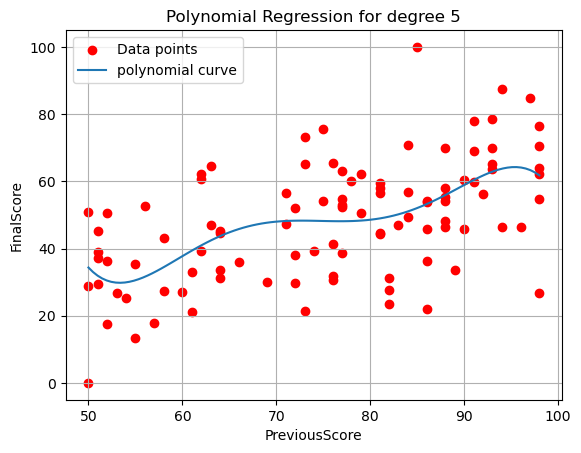

In [223]:
def polynomial_regression(X , Y , degree = 2):
    '''Input
        X: independent variable on which we have to apply polynomial regression
        Y: dependent variable(FinalScore)
        degree: degree of polynoimial(default is set to 2)'''
    X = np.array(X)
    Y = np.array(Y)
    n = X.shape[0]
    poly_X = np.zeros((n , degree + 1))
    for i in range(degree+1):
        poly_X[: , i] = X**i
    XTX_inv = np.linalg.inv((poly_X.T @ poly_X))
    XTY = poly_X.T @ Y
    beta = XTX_inv @ XTY
    
    #calculating r-squared
    Y_predicted = poly_X @ beta.T
    y = Y - np.mean(Y)
    y_predicted = Y_predicted - np.mean(Y_predicted)
    ESS = np.dot(y_predicted,y_predicted)
    TSS = np.dot(y , y)
    r_squared = ESS/TSS
    print(f"coefficient of determination for degree {degree}: {r_squared}")
    
    #plotting the curve
    X_smooth = np.linspace(min(X), max(X), X.shape[0])
    poly_X_smooth = np.zeros((n , degree + 1))
    for i in range(degree+1):
        poly_X_smooth[: , i] = X_smooth**i
    Y_predicted_smooth = poly_X_smooth @ beta.T
    plt.scatter(X,Y,label="Data points", color="red")
    plt.plot(X_smooth, Y_predicted_smooth, label="polynomial curve")
    plt.legend()
    plt.grid()
    plt.xlabel(best_independent_variable)
    plt.ylabel('FinalScore')
    plt.title(f"Polynomial Regression for degree {degree}")
    return beta
    
degree = 5
beta = polynomial_regression(previousScore, finalScore,degree)
print(f"coefficients for degree are {degree}:")
for i in range(degree + 1):
    print(f"Beta{i}: {beta[i]}")

Again here , I have made the regression curve smooth by plotting it against the equally spaced X variable

**Q7 Prediction and Confidence Intervals for the Best Variable**

Create a Python function that reads a data frame containing the identified
best independent variable and the FinalScore column. Perform bivariate
regression and then use the regression line to make predictions for new $X$
values. Calculate the confidence intervals for the coefficients.

We have confidence interval for 

$$\beta_0 = {\hat{\beta_0} \ \underline{+} \ t_{\alpha/2}.se(\hat{\beta_0})}$$

$$\beta_1 = {\hat{\beta_1} \ \underline{+} \ t_{\alpha/2}.se(\hat{\beta_1})}$$

where se = standard error
$$se(\hat{\beta_1)} = \sqrt{{\sigma^2 \over {\sum\limits_{i = 1}^{n} {x_i^2}}}}$$

$$se(\hat{\beta_0)} = {se(\hat{\beta_1)} .\sqrt{\sum\limits_{i = 1}^n X_i^2 \over n }}$$

and $t$ is the Student's $t$-distribution of $n - 2$ degree of freedom

In [221]:
def Confidence_Interval(df , alpha = 0.1):
    '''Input df: It consist of two columns . 
    First Column is best independent
    Variable and second is FinalScore
    alpha: Confidence level'''
    
    columns = df.columns 
    X = np.array(df.iloc[:,0])
    Y = np.array(df.iloc[:,1])
    test_X = np.array(testdf['PreviousScore'].values.tolist())
    
    n = X.shape[0]
    beta0 , beta1 = Bivariate_regression(X,Y)
#     print(f"Bivariate Regression between {columns[0]} and {columns[1]}: " ,
#           f"\nBeta0: {beta0}  , Beta1: {beta1}\n")
    
    Y_predicted = beta0 + beta1*X
    Residuals = Y - Y_predicted
    RSS = np.dot(Residuals , Residuals)
#     print("Residual sum of squares:{} ".format(RSS))
    
    sigma_hat_2 = RSS/(n - 2)
    sigma_hat = np.sqrt(sigma_hat_2)
    sumxx_2 = np.dot(X - np.mean(X) , X- np.mean(X))
    sumXX_2 = np.dot(X , X)
    
    sebeta1 = sigma_hat/np.sqrt(sumxx_2)
    sebeta0 = sebeta1*np.sqrt(sumXX_2)/np.sqrt(n)
#     print("Standard Error of beta0: {}".format(sebeta0))
#     print("Standard Error of beta1: {}".format(sebeta1))
#     print()
    
    confidence_interval = np.zeros((2,2))
    critical_value = abs(stats.t.ppf(alpha/2 , n- 2))
    confidence_interval[0,:] = np.array([beta0 - sebeta0*critical_value,\
                                        beta0 + sebeta0*critical_value])
    confidence_interval[1,:] = np.array([beta1 - sebeta1*critical_value,\
                                        beta1 + sebeta1*critical_value])
    
    test_Y_predicted =  beta0 + beta1*test_X

    return (confidence_interval, test_Y_predicted)
    
    
#confidence levels
alphas = [0.1,0.05,0.01]
for alpha in alphas:
    confidence_interval,test_Y_predicted = Confidence_Interval(df[[best_independent_variable,\
                                                                   "FinalScore"]], alpha)
    print("Confidence Interval for alpha = {} are Beta0 : [{},{}]".\
          format(alpha , confidence_interval[0,0],confidence_interval[0,1]))
    print("Confidence Interval for alpha = {} are Beta1 : [{},{}]".\
          format(alpha , confidence_interval[1,0],confidence_interval[1,1]))
    print()

Y_predicted = pd.DataFrame({best_independent_variable : \
                            testdf[best_independent_variable].values.tolist(),\
                           "Predicted_Final_Score" : test_Y_predicted})
print()
print(Y_predicted)
    

#Reading test dataset

Confidence Interval for alpha = 0.1 are Beta0 : [-15.244621590578472,11.244354690429684]
Confidence Interval for alpha = 0.1 are Beta1 : [0.49157683721701284,0.8352051849748878]

Confidence Interval for alpha = 0.05 are Beta0 : [-17.828164163970346,13.827897263821558]
Confidence Interval for alpha = 0.05 are Beta1 : [0.45806182114244715,0.8687202010494535]

Confidence Interval for alpha = 0.01 are Beta0 : [-22.952427708796215,18.952160808647427]
Confidence Interval for alpha = 0.01 are Beta1 : [0.3915872923911455,0.9351947298007552]


   PreviousScore  Predicted_Final_Score
0             73              46.427410
1             94              60.358622
2             62              39.130109
3             55              34.486372
4             58              36.476545
5             74              47.090801
6             80              51.071147
7             93              59.695231
8             78              49.744365
9             74              47.090801


**Q8 Multiple Linear Regression**

Extend the implementation of bivariate regression to handle multiple independent variables. Create a Python function that performs multiple linear
regression on the Student Performance dataset. Use **StudyHours, PreviousScore, PracticeTests**, and **Age** columns as independent variables
$(X)$ and the **FinalScore** column as the dependent variable $(Y)$. Return
the regression coefficients for each independent variable.

In [222]:
def multiple_linear_regression(df):
    '''Inputs
        df: dataframe for a dataset where the last column contains the 
        dependent variable
        '''
    X = np.array(df.iloc[:,:-1])
    n = X.shape[0]
    X = np.concatenate([np.ones((n, 1)), X],axis = 1)
    Y = np.array(df.iloc[:,-1])
   
    XTX_inv = np.linalg.inv((X.T @ X))
    XTY = X.T @ Y
    beta = XTX_inv @ XTY
    return beta

beta = multiple_linear_regression(df)
independent_variables = df.columns
print("Multiple linear Regression coefficients are:\n")
print("beta0: {}\n"
      "beta1 corresponding to {}: {}\n"
      "beta2 corresponding to {}: {}\n"
      "beta3 corresponding to {}: {}\n"
      "beta4 corresponding to {}: {}\n".format(beta[0],
                                                independent_variables[0], beta[1],
                                                independent_variables[1], beta[2],
                                                independent_variables[2], beta[3],
                                                independent_variables[3], beta[4]))



Multiple linear Regression coefficients are:

beta0: -14.677321241798294
beta1 corresponding to StudyHours: 1.940739158760386
beta2 corresponding to PreviousScore: 0.6386328993302007
beta3 corresponding to PracticeTests: 1.0233678613716066
beta4 corresponding to Age: -0.0892834014316358

